In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Checking the data

In [2]:
# Read the CSV files
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')

# Merge the two dataframes
student_data = pd.concat([df1, df2])

student_data.to_csv("combined.csv", index=False)

##### Understanding the data

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
student_data.drop(columns=student_data.columns[0], axis=1,  inplace=True)

In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [7]:
print(student_data.duplicated().sum())
student_data.drop_duplicates()
student_data.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    

### Missing values

<Axes: >

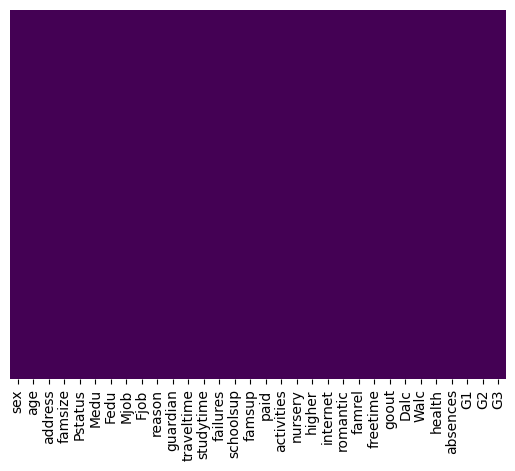

In [8]:
sns.heatmap(student_data.isnull(), yticklabels = False, cbar=False, cmap='viridis')

There are no missing values

### Outliers

In [9]:
student_data.nunique()

sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

<Axes: ylabel='age'>

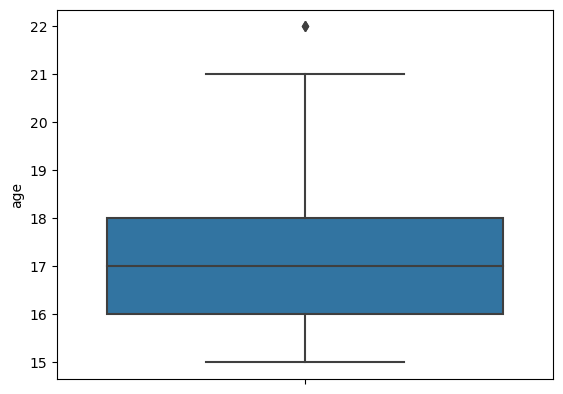

In [10]:
sns.boxplot(y=student_data['age'])

<Axes: ylabel='absences'>

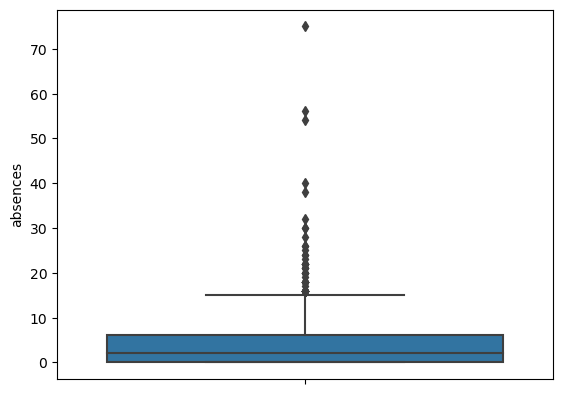

In [11]:
sns.boxplot(y=student_data['absences'])


#### Removing outliers from 'absences'

In [12]:
student_data = student_data[student_data['absences'] < 45]

### Inserting new columns

In [13]:
'''
new column with the mean of 'walc' and 'dalc'
'''

# Assuming 'walc' and 'dalc' columns exist in student_data
student_data['Malc'] = (student_data['Dalc'] * 5 + student_data['Walc'] * 2) / 7

# If you want to round up to the nearest integer, you can use np.ceil
student_data['Malc'] = np.ceil(student_data['Malc']).astype(int)

In [14]:
student_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Malc
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,1
1,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,1
2,F,15,U,LE3,T,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,3
3,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,1
4,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,2


### Correlation

In [15]:
df_corr = student_data

column_mapping = {
    'sex': {'F': 0, 'M': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1},
    'Mjob': {'at_home':0, 'services': 1, 'teacher': 2, 'health':3, 'other':4},
    'Fjob': {'at_home':0, 'services': 1, 'teacher': 2, 'health':3, 'other':4},
    'reason': {'course':0, 'home': 1, 'reputation': 2, 'other':3},
    'guardian': {'mother':0, 'father': 1, 'other': 2},
    'address': {'U':0, 'R':1}
}

for column, mapping in column_mapping.items():
    df_corr[column] = df_corr[column].map(mapping)

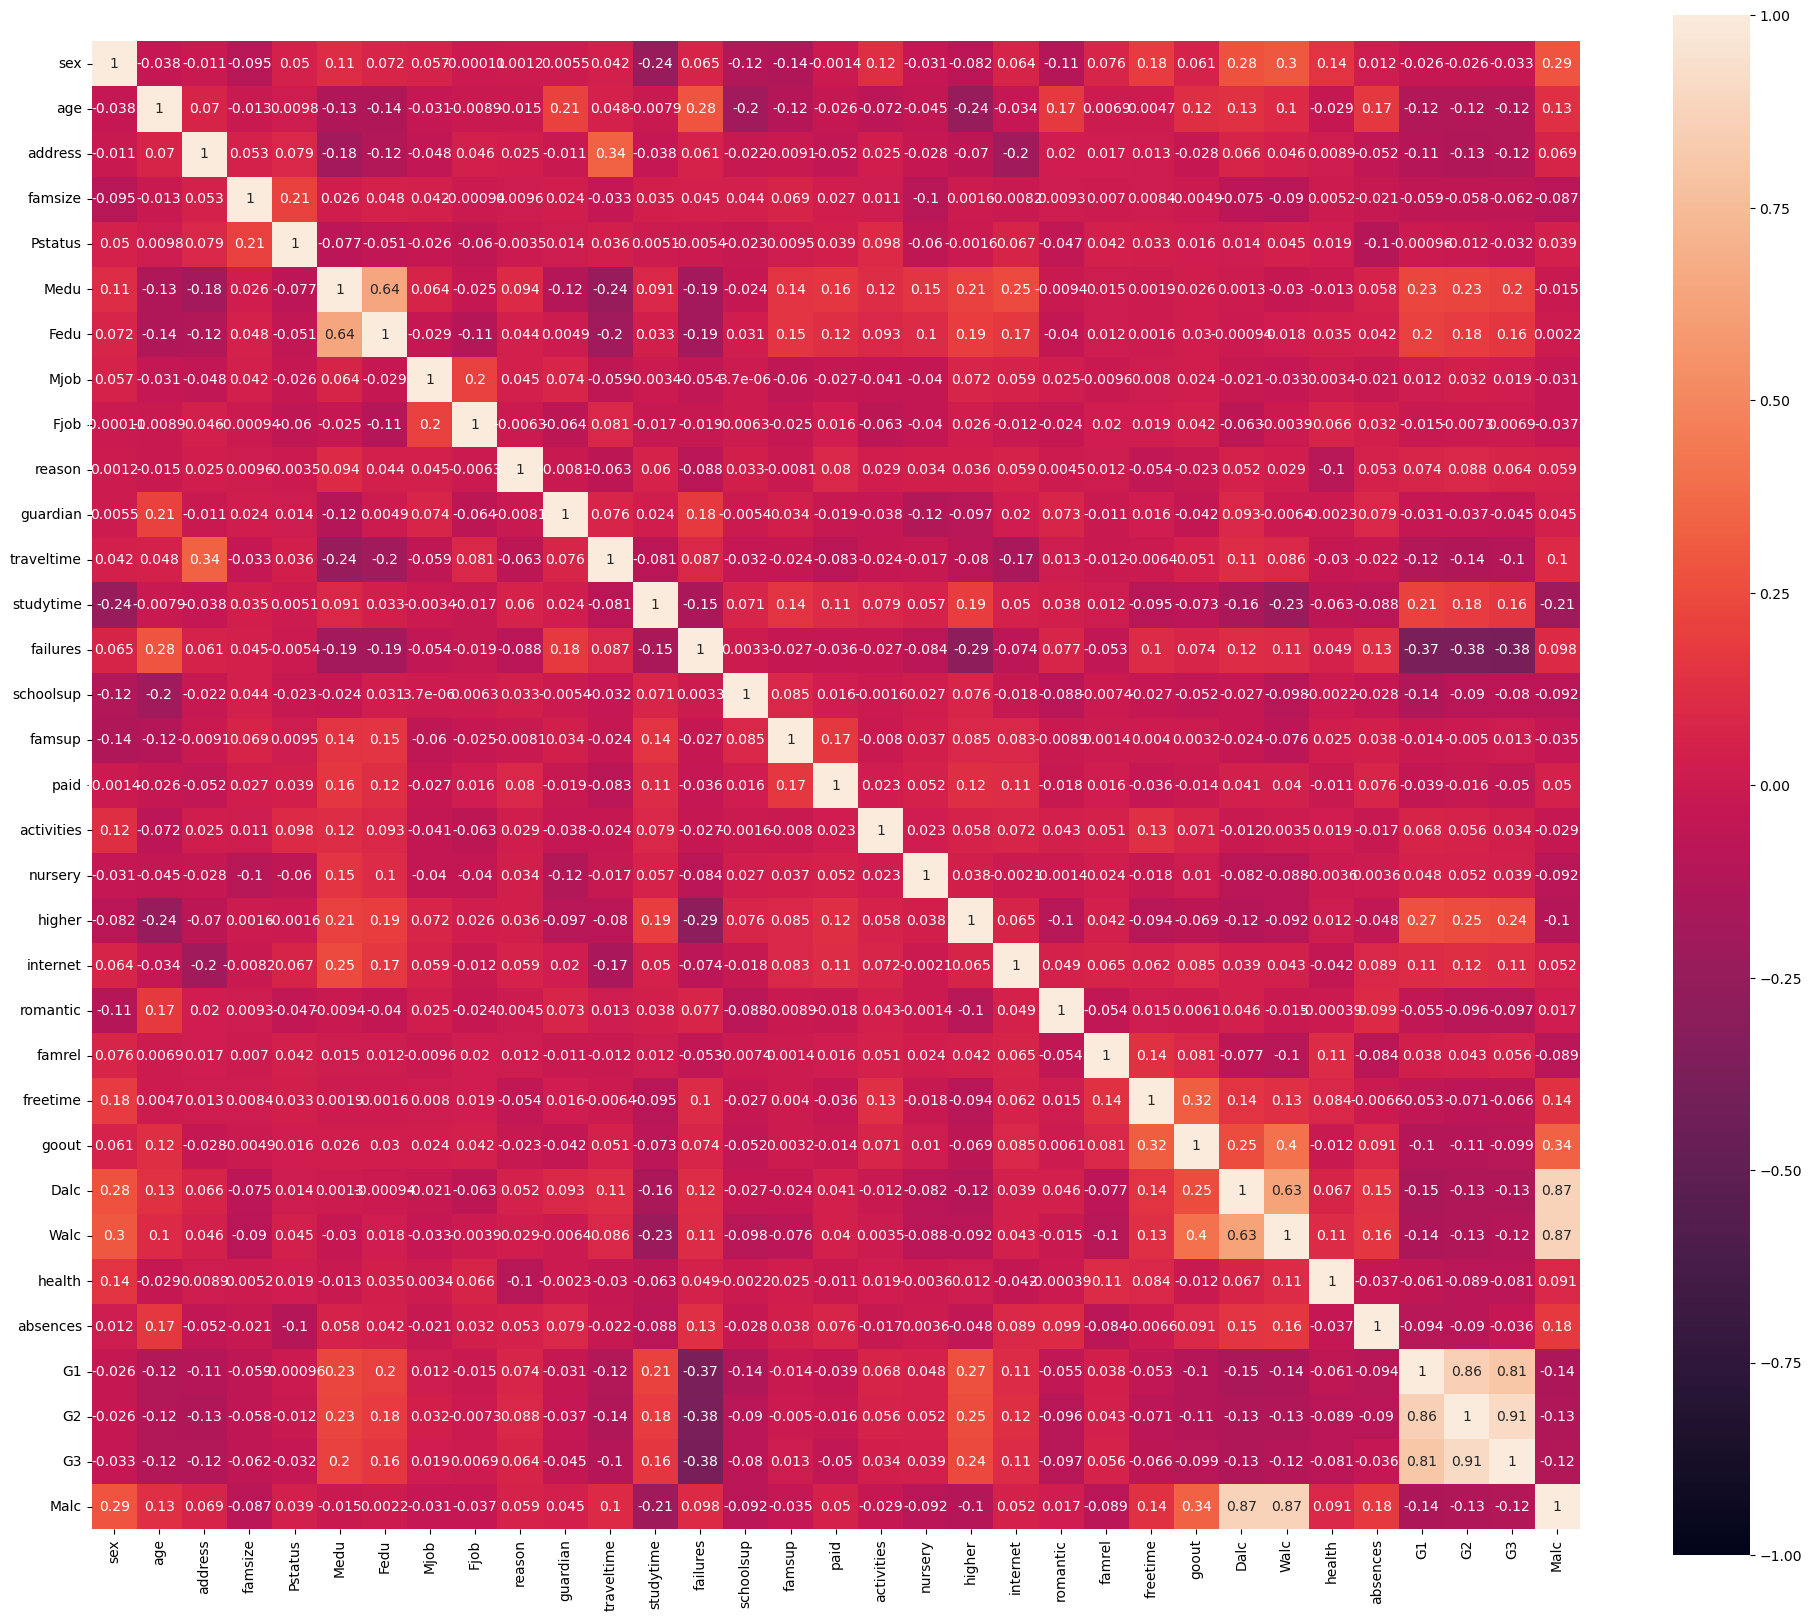

In [16]:
corr_matrix = df_corr.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix,vmin=-1,vmax=1, square = True, annot = True);

#### Top 15 correlations

In [17]:
top_corr = corr_matrix.unstack()
top_corr = top_corr[top_corr != 1]  
top_15_corr = top_corr['G3'].nlargest(15) # Get the top 15 correlations

print(top_15_corr)

G2            0.910720
G1            0.808999
higher        0.236317
Medu          0.202145
studytime     0.161770
Fedu          0.160244
internet      0.107930
reason        0.064427
famrel        0.055519
nursery       0.039350
activities    0.034418
Mjob          0.019427
famsup        0.013333
Fjob          0.006883
Pstatus      -0.032108
dtype: float64


In [18]:
top_down_corr = corr_matrix.unstack()
top_down_15_corr = top_corr['G3'].nsmallest(15) # Get the top down 15 correlations

print(top_down_15_corr)

failures     -0.384046
Dalc         -0.129576
age          -0.124705
Malc         -0.121751
address      -0.117563
Walc         -0.115979
traveltime   -0.103030
goout        -0.099313
romantic     -0.096771
health       -0.081126
schoolsup    -0.079964
freetime     -0.066495
famsize      -0.062197
paid         -0.050081
guardian     -0.045188
dtype: float64


Students with better grades in the first and second periods are less likely to fail at school

In [19]:
X = df_corr.drop(['famsup', 'guardian', 'Fjob', 'Mjob', 'nursery', 'G1', 'G2', 'G3'], axis=1)
y = df_corr['G3']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [21]:
def calculate_metrics(y_test, y_pred):
    # Mean Squared Error (MSE)
    mse = metrics.mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

    # Mean Absolute Error (MAE)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae:.2f}')

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error: {rmse:.2f}')

### Decision Tree

In [22]:
clf = DecisionTreeRegressor(max_depth=3,random_state=2021)

clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=2021)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
calculate_metrics(y_test,y_pred)

Mean Squared Error: 13.61
Mean Absolute Error: 2.63
Root Mean Squared Error: 3.69


### Linear Regression

In [25]:
from sklearn import linear_model

# Create linear regression object 
regr = linear_model.LinearRegression()

# Train the model using the training sets 
regr.fit(X_train, y_train) 

LinearRegression()

In [26]:
y_pred = regr.predict(X_test)

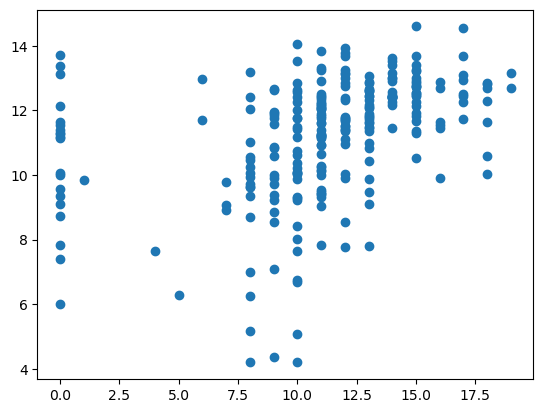

In [27]:
plt.scatter(y_test,y_pred)

In [28]:
calculate_metrics(y_test, y_pred)

Mean Squared Error: 14.98
Mean Absolute Error: 2.66
Root Mean Squared Error: 3.87


In [29]:
# The coefficient of determination: 1 is perfect prediction
print("Intercept: %.2f" % regr.intercept_)

Intercept: 10.05


intercept -> Represents the value of the dependent variable (G3) when all independent variables are zeros

r-squared value -> Measures how well the independent variables explain the variety of the dependent variable. (1 indicates perfect)

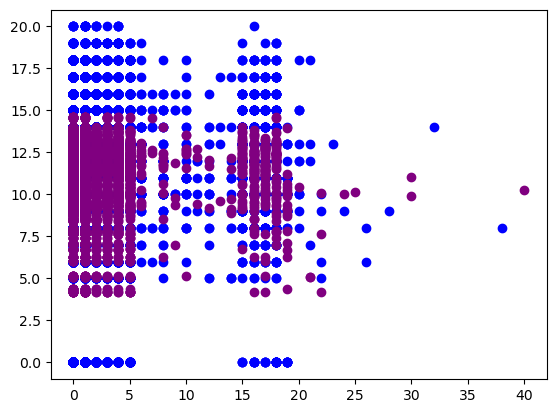

In [30]:
# Plot outputs 
plt.plot(X_train, y_train, color='blue', marker='o', linestyle='None', label='Training Data')

# Plot testing data with a different color
plt.plot(X_test, regr.predict(X_test), color='purple', marker='o', linestyle='None', label='Test Predictions')

# Show the plot
plt.show()

#### with GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
print("Depth: ", clf.get_depth())
print("Number of leaves: ", clf.get_n_leaves())

Depth:  3
Number of leaves:  8


In [33]:
param_grid_dt = {
    'fit_intercept': [True, False]
}

fit_intercept: Indicates if the model should have an independent term or not.The values [True, False] indicate that GridSearchCV will test both options.

In [34]:
grid_search = GridSearchCV(regr, param_grid_dt, scoring='neg_mean_squared_error', cv=5)

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [36]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'fit_intercept': True}


In [37]:
y_pred = grid_search.predict(X_test)
calculate_metrics(y_test, y_pred)

Mean Squared Error: 14.98
Mean Absolute Error: 2.66
Root Mean Squared Error: 3.87


### Random Forest

O random forest é um algortimo que tem por base usar vários resultados de árvores diferentes para chegar à conclusão do resultado final. Em analogia é como pedir opinião a mais do que uma pessoa sobre um determinado tema, e a opinião que mais gente tiver é a escolhida.
O algoritmo em si baseia-se em árvores de decisão que são criadas como partição de uma primeira árvore. 
O Random Forest usa _bagging_, sendo que este fuciona da seguinte forma.
1. **Seleção do subset** : Escolhe um sample random do dataset.
2. **Bootstrap sampling**: Cada modelo é criado a partir deste samples, ou subsets.
3. **Bootstrapping**: É o passo de row sampling com replacement.

In [38]:
random_forest = student_data.copy()
random_forest.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Malc
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,...,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,0.435159,16.725264,0.272815,0.707012,0.884726,2.602305,2.387128,2.237272,2.761768,1.031700,...,3.203650,3.158501,1.493756,2.283381,3.542747,4.269933,11.217099,11.249760,11.347743,2.013449
std,0.496016,1.240900,0.445620,0.455352,0.319506,1.126326,1.101130,1.587933,1.489359,1.032153,...,1.030695,1.152275,0.912630,1.285048,1.423142,5.379729,2.986659,3.288246,3.868278,1.045049
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,1.000000
50%,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,4.000000,1.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,2.000000
75%,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,4.000000,4.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,3.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,19.000000,19.000000,20.000000,5.000000


In [39]:
labels = np.array(random_forest['G3'])

random_forest = random_forest.drop('G1', axis=1)
random_forest = random_forest.drop('G2', axis=1)
random_forest = random_forest.drop('G3', axis=1)

random_forest_list = list(random_forest.columns)
random_forest = np.array(random_forest)

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(random_forest, labels, test_size = 0.2, random_state = 42)

In [41]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (832, 30)
Training Labels Shape: (832,)
Testing Features Shape: (209, 30)
Testing Labels Shape: (209,)


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [43]:
calculate_metrics(test_labels, predictions)

Mean Squared Error: 8.45
Mean Absolute Error: 2.13
Root Mean Squared Error: 2.91


In [44]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(random_forest_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: failures             Importance: 0.17
Variable: absences             Importance: 0.15
Variable: age                  Importance: 0.04
Variable: Medu                 Importance: 0.04
Variable: Fedu                 Importance: 0.04
Variable: freetime             Importance: 0.04
Variable: goout                Importance: 0.04
Variable: health               Importance: 0.04
Variable: Mjob                 Importance: 0.03
Variable: Fjob                 Importance: 0.03
Variable: reason               Importance: 0.03
Variable: studytime            Importance: 0.03
Variable: schoolsup            Importance: 0.03
Variable: paid                 Importance: 0.03
Variable: famrel               Importance: 0.03
Variable: guardian             Importance: 0.02
Variable: traveltime           Importance: 0.02
Variable: higher               Importance: 0.02
Variable: Dalc                 Importance: 0.02
Variable: Walc                 Importance: 0.02
Variable: Malc                 Importanc

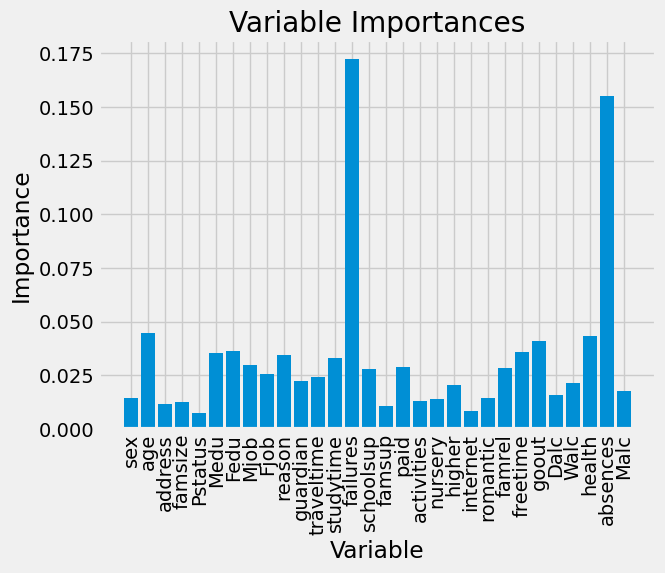

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, random_forest_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Neural Networks

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

2023-12-29 16:55:39.772987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim = 25, activation = activation)) # 20 é o nr de predictions no input
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation)) # output
    
    # Compile the model 
    model.compile(
        loss='mae',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )
    
    return model

In [48]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                416       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


2023-12-29 16:55:41.280095: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [49]:
from sklearn.model_selection import KFold

In [50]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer=optimizer)

kf = KFold(n_splits=5, shuffle = True, random_state=2021)

In [51]:
model = KerasRegressor(model = build_model, batch_size=32, validation_split=0.2, epochs=20)


In [52]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = kf, scoring = 'neg_mean_absolute_error', refit='True', verbose=1)

In [53]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 6.8390 - mae: 6.8390 - mse: 64.1526 - val_loss: 3.5905 - val_mae: 3.5905 - val_mse: 21.3761
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 3.5269 - mae: 3.5269 - mse: 21.8458 - val_loss: 3.1415 - val_mae: 3.1415 - val_mse: 16.1278
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 3.0014 - mae: 3.0014 - mse: 15.7752 - val_loss: 2.9591 - val_mae: 2.9591 - val_mse: 14.5881
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 2.7461 - mae: 2.7461 - mse: 14.1959 - val_loss: 2.8022 - val_mae: 2.8022 - val_mse: 14.5319
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 2.6724 - mae: 2.6724 - mse: 14.0062 - val_loss: 2.7329 - val_mae: 2.7329 - val_mse: 13.5449
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 2.6275 - mae: 2.6275 - mse: 13.6180 - val_l

Epoch 9/20
16/16 [==============================] - 0s 12ms/step - loss: 2.3914 - mae: 2.3914 - mse: 11.6171 - val_loss: 2.7384 - val_mae: 2.7384 - val_mse: 15.2510
Epoch 10/20
16/16 [==============================] - 0s 14ms/step - loss: 2.5613 - mae: 2.5613 - mse: 12.5951 - val_loss: 2.6927 - val_mae: 2.6927 - val_mse: 13.4380
Epoch 11/20
16/16 [==============================] - 0s 13ms/step - loss: 2.4261 - mae: 2.4261 - mse: 11.7377 - val_loss: 2.6548 - val_mae: 2.6548 - val_mse: 13.1609
Epoch 12/20
16/16 [==============================] - 0s 11ms/step - loss: 2.5454 - mae: 2.5454 - mse: 12.4536 - val_loss: 2.4833 - val_mae: 2.4833 - val_mse: 12.3392
Epoch 13/20
16/16 [==============================] - 0s 15ms/step - loss: 2.5711 - mae: 2.5711 - mse: 13.0542 - val_loss: 2.4662 - val_mae: 2.4662 - val_mse: 12.3676
Epoch 14/20
16/16 [==============================] - 0s 16ms/step - loss: 2.5210 - mae: 2.5210 - mse: 12.4422 - val_loss: 2.4647 - val_mae: 2.4647 - val_mse: 12.5204
Epoch

Epoch 18/20
16/16 [==============================] - 0s 15ms/step - loss: 2.3966 - mae: 2.3966 - mse: 11.2768 - val_loss: 2.3700 - val_mae: 2.3700 - val_mse: 10.8250
Epoch 19/20
16/16 [==============================] - 0s 18ms/step - loss: 2.3901 - mae: 2.3901 - mse: 11.4121 - val_loss: 2.3589 - val_mae: 2.3589 - val_mse: 10.7901
Epoch 20/20
5/5 [==============================] - 0s 4ms/step
Epoch 1/20
16/16 [==============================] - 1s 43ms/step - loss: 9.8910 - mae: 9.8910 - mse: 110.8987 - val_loss: 5.4666 - val_mae: 5.4666 - val_mse: 37.8521
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 3.7759 - mae: 3.7759 - mse: 23.8757 - val_loss: 3.6196 - val_mae: 3.6196 - val_mse: 19.2716
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 3.2370 - mae: 3.2370 - mse: 17.7927 - val_loss: 2.9581 - val_mae: 2.9581 - val_mse: 16.1934
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 2.9054 - mae: 2.9054 - mse: 15.6614 

Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 2.5732 - mae: 2.5732 - mse: 13.1728 - val_loss: 2.6955 - val_mae: 2.6955 - val_mse: 14.7845
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 2.5393 - mae: 2.5393 - mse: 12.7204 - val_loss: 2.5630 - val_mae: 2.5630 - val_mse: 12.7473
Epoch 8/20
16/16 [==============================] - 0s 16ms/step - loss: 2.5209 - mae: 2.5209 - mse: 12.4481 - val_loss: 2.4406 - val_mae: 2.4406 - val_mse: 12.3819
Epoch 9/20
16/16 [==============================] - 0s 15ms/step - loss: 2.4796 - mae: 2.4796 - mse: 12.2760 - val_loss: 2.4255 - val_mae: 2.4255 - val_mse: 12.4144
Epoch 10/20
16/16 [==============================] - 0s 16ms/step - loss: 2.5043 - mae: 2.5043 - mse: 12.0941 - val_loss: 2.4198 - val_mae: 2.4198 - val_mse: 12.2876
Epoch 11/20
16/16 [==============================] - 0s 12ms/step - loss: 2.4393 - mae: 2.4393 - mse: 12.0262 - val_loss: 2.6136 - val_mae: 2.6136 - val_mse: 14.2449
Epoch 12

Epoch 15/20
16/16 [==============================] - 0s 15ms/step - loss: 2.3653 - mae: 2.3653 - mse: 11.5677 - val_loss: 2.4432 - val_mae: 2.4432 - val_mse: 11.2920
Epoch 16/20
16/16 [==============================] - 0s 13ms/step - loss: 2.4118 - mae: 2.4118 - mse: 11.9139 - val_loss: 2.5052 - val_mae: 2.5052 - val_mse: 12.5481
Epoch 17/20
16/16 [==============================] - 0s 13ms/step - loss: 2.4114 - mae: 2.4114 - mse: 11.8024 - val_loss: 2.4300 - val_mae: 2.4300 - val_mse: 11.7059
Epoch 18/20
16/16 [==============================] - 0s 27ms/step - loss: 2.4077 - mae: 2.4077 - mse: 11.6843 - val_loss: 2.4088 - val_mae: 2.4088 - val_mse: 11.2199
Epoch 19/20
16/16 [==============================] - 0s 14ms/step - loss: 2.5127 - mae: 2.5127 - mse: 12.3997 - val_loss: 2.5551 - val_mae: 2.5551 - val_mse: 11.7172
Epoch 20/20
5/5 [==============================] - 0s 8ms/step
Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 6.9757 - mae: 6.9757 - mse: 61.448

16/16 [==============================] - 0s 18ms/step - loss: 2.7475 - mae: 2.7475 - mse: 14.2955 - val_loss: 2.7990 - val_mae: 2.7990 - val_mse: 13.9312
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 2.6519 - mae: 2.6519 - mse: 13.7614 - val_loss: 2.6304 - val_mae: 2.6304 - val_mse: 13.1416
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 2.5644 - mae: 2.5644 - mse: 12.7505 - val_loss: 2.5546 - val_mae: 2.5546 - val_mse: 12.7679
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 2.5167 - mae: 2.5167 - mse: 12.5397 - val_loss: 2.7476 - val_mae: 2.7476 - val_mse: 13.5607
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 2.6609 - mae: 2.6609 - mse: 12.7597 - val_loss: 2.9038 - val_mae: 2.9038 - val_mse: 14.3463
Epoch 8/20
16/16 [==============================] - 0s 20ms/step - loss: 2.4778 - mae: 2.4778 - mse: 12.5154 - val_loss: 2.5229 - val_mae: 2.5229 - val_mse: 12.5472
Epoch 9/20
16/16 [===

16/16 [==============================] - 0s 18ms/step - loss: 2.4120 - mae: 2.4120 - mse: 11.8811 - val_loss: 2.4630 - val_mae: 2.4630 - val_mse: 11.5287
Epoch 12/20
16/16 [==============================] - 0s 17ms/step - loss: 2.5989 - mae: 2.5989 - mse: 12.6382 - val_loss: 2.5111 - val_mae: 2.5111 - val_mse: 11.4168
Epoch 13/20
16/16 [==============================] - 0s 17ms/step - loss: 2.4051 - mae: 2.4051 - mse: 11.9197 - val_loss: 2.4641 - val_mae: 2.4641 - val_mse: 11.3993
Epoch 14/20
16/16 [==============================] - 0s 28ms/step - loss: 2.3956 - mae: 2.3956 - mse: 11.9048 - val_loss: 2.4493 - val_mae: 2.4493 - val_mse: 11.0893
Epoch 15/20
16/16 [==============================] - 0s 18ms/step - loss: 2.4474 - mae: 2.4474 - mse: 11.7624 - val_loss: 2.6113 - val_mae: 2.6113 - val_mse: 11.8523
Epoch 16/20
16/16 [==============================] - 0s 13ms/step - loss: 2.4639 - mae: 2.4639 - mse: 11.7398 - val_loss: 2.4071 - val_mae: 2.4071 - val_mse: 11.0275
Epoch 17/20
16/1

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x7f04de0d1d80>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [54]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))


Best: -4.151025 using {'optimizer': 'RMSprop'}


In [55]:
best_mlp = grid_search.best_estimator_
print(best_mlp)

KerasRegressor(
	model=<function build_model at 0x7f04de0d1d80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


In [56]:
best_mlp.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 22ms/step - loss: 5.4223 - mae: 5.4223 - mse: 49.0352 - val_loss: 3.0501 - val_mae: 3.0501 - val_mse: 19.0920
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 2.8150 - mae: 2.8150 - mse: 15.1427 - val_loss: 3.0584 - val_mae: 3.0584 - val_mse: 17.9894
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 2.6328 - mae: 2.6328 - mse: 13.1339 - val_loss: 2.7470 - val_mae: 2.7470 - val_mse: 17.3617
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 2.4773 - mae: 2.4773 - mse: 12.3086 - val_loss: 2.6674 - val_mae: 2.6674 - val_mse: 16.2127
Epoch 5/20
25/25 [==============================] - 0s 11ms/step - loss: 2.4516 - mae: 2.4516 - mse: 11.7794 - val_loss: 2.6394 - val_mae: 2.6394 - val_mse: 15.7958
Epoch 6/20
25/25 [==============================] - 0s 12ms/step - loss: 2.4524 - mae: 2.4524 - mse: 11.7493 - val_loss: 2.6891 - val_mae: 2.6891 - val_mse: 15.5764
Epoch 7/20


KerasRegressor(
	model=<function build_model at 0x7f04de0d1d80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

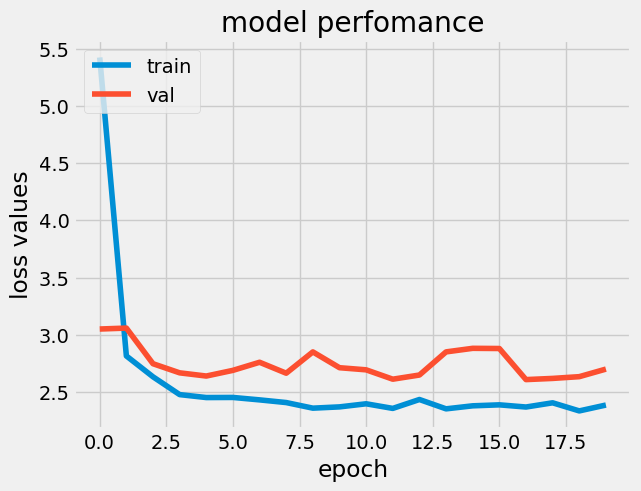

In [57]:
plt.plot(best_mlp.history_['loss'])
plt.plot(best_mlp.history_['val_loss'])
plt.title('model perfomance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

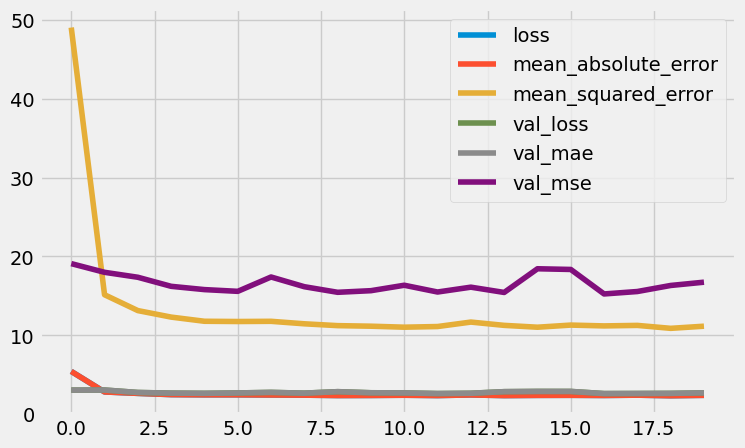

In [58]:
pd.DataFrame(best_mlp.history_).plot(figsize=(8,5))
plt.show()

In [59]:
pred = best_mlp.predict(X_test)

9/9 [==============================] - 0s 6ms/step


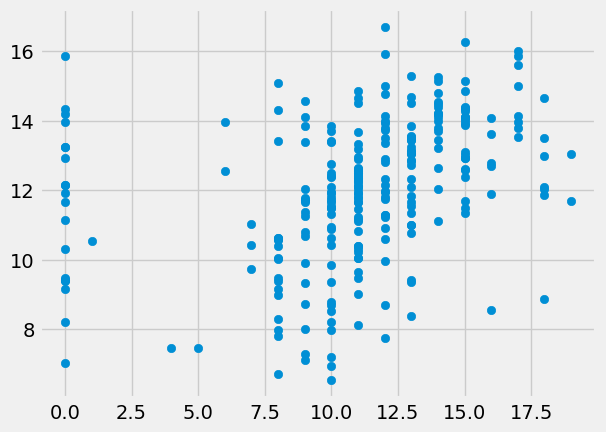

In [60]:
plt.scatter(y_test, pred)

In [61]:
calculate_metrics(y_test,pred)

Mean Squared Error: 16.74
Mean Absolute Error: 2.70
Root Mean Squared Error: 4.09
